

# Project: Investigate a Dataset - [No-show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The dataset I have selected is the no-show appointments, which has information from 100k medical appointments and shows whether or not a patient shows up for their appointment or not.
It contains some characteristics of the patient like the age, neighbourhood, whether or not the patient is enrolled in a Brasillian welfare, the gender and whether or not they showed up for the appointment among many others.


### Questions for Analysis
**QUESTION ONE**  
Does the age of a patient whether or not they attend their appointment or not?  
**QUESTION TWO**  
Who miss their appointments more, males or females?  
**QUESTION THREE**  
Do people of a specific neighbourhood have a tendency of missing their appointmnents?   
**QUESTION FOUR**  
Does receiving or not receiving a message affect whether or not a patient shows up for their appointment?  
**QUESTION FIVE**  
Does the day of the week scheduled for the appointment affect whether or not a patient will miss their appointment?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.24.0


Requirement already up-to-date: pandas==0.24.0 in /opt/conda/lib/python3.6/site-packages (0.24.0)


<a id='wrangling'></a>
## Data Wrangling

In this section, I load the data and check if my dataset is clean

### General Properties  
>The dataset has 14 columns and 110527 entries.  


In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
no_show_appointments = pd.read_csv('noshowappointments.csv')
no_show_appointments.head()
no_show_appointments.info()
no_show_appointments.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> There is no missing data in the dataset  
Notice that the ScheduledDay and AppointmentDay have the wrong data types so we will convert them to datetime


### Data Cleaning
 

In [6]:
# Converting the ScheduledDay to datetime
no_show_appointments['ScheduledDay'] = pd.to_datetime(no_show_appointments['ScheduledDay'])

In [7]:
# Converting the AppointmentDay to the day of the week
no_show_appointments['AppointmentDay'] = pd.to_datetime(no_show_appointments['AppointmentDay']).dt.day_name()

In [8]:
# Check for duplictates
no_show_appointments.duplicated().sum()

0

In [9]:
# Lets rename the wrongly spelled column names
no_show_appointments = no_show_appointments.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap'})

In [10]:
# Lets rename the values of no-show to make it easily understandable
no_show_appointments['No-show'] = no_show_appointments['No-show'].replace(['No'],'Showed up')
no_show_appointments['No-show'] = no_show_appointments['No-show'].replace(['Yes'],'Not Show up')


In [11]:
print(no_show_appointments.head(5))

      PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08         Friday   62   
1  5.589980e+14        5642503      M 2016-04-29 16:08:27         Friday   56   
2  4.262960e+12        5642549      F 2016-04-29 16:19:04         Friday   62   
3  8.679510e+11        5642828      F 2016-04-29 17:29:31         Friday    8   
4  8.841190e+12        5642494      F 2016-04-29 16:07:23         Friday   56   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handicap  SMS_received    No-show  
0         0             0  Showed u

In [12]:
# We can drop some columns that are not necessary to make the data set more readable. That is patient id, appointment id
no_show_appointments.drop(columns=['PatientId','AppointmentID'], axis=1, inplace=True)


#### DATA WRANGLING AND CLEANING RESULTS
>The data set had 14 columns and 110527 entries but after dropping some columns the dataset now has 11 columns  
The data type for Scheduled and Appointment days have been changed to datetime  
The data set has no duplicate values  
The columns with wrongly spelled column names have been corrected  
The values in the No-show column have been changed to make it more understandable


<a id='eda'></a>
## Exploratory Data Analysis
> Here I investigate the questions stated above in a systematic approach.



### Does the age of a patient determine whether or not they attend their appointment or not? 

In [13]:
# Let us make sure we have the right values for the age
no_show_appointments['Age'].value_counts()


 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

>Notice there is an age of -1, which is not reasonable so we will drop it

In [14]:
# Drop the row that has an age value of -1
no_show_appointments = no_show_appointments.drop(no_show_appointments.query("Age == -1").index)


In [96]:
# Confirm the changes
no_show_appointments['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
56     1635
38     1629
59     1624
2      1618
50     1613
57     1603
36     1580
51     1567
19     1545
39     1536
37     1533
54     1530
34     1526
33     1524
30     1521
6      1521
3      1513
17     1509
32     1505
5      1489
44     1487
18     1487
58     1469
46     1460
45     1453
       ... 
72      615
74      602
76      571
75      544
78      541
77      527
80      511
81      434
82      392
79      390
84      311
83      280
85      275
86      260
87      184
89      173
88      126
90      109
92       86
91       66
93       53
94       33
95       24
96       17
97       11
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

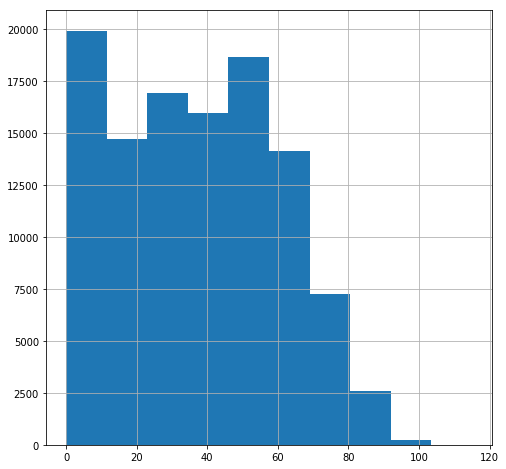

In [15]:
# No we plot a bar chart showing the correlation between age and not showing up
no_show_appointments.Age.hist(figsize=(8,8))

In [16]:
# We get the proportion between age and missing appointments
age_noshow = pd.crosstab(index=no_show_appointments['Age'], columns=
                                 no_show_appointments['No-show'], normalize='index')
print(age_noshow)

No-show  Not Show up  Showed up
Age                            
0           0.180559   0.819441
1           0.182578   0.817422
2           0.155748   0.844252
3           0.183080   0.816920
4           0.217090   0.782910
5           0.214909   0.785091
6           0.207758   0.792242
7           0.210932   0.789068
8           0.223315   0.776685
9           0.265306   0.734694
10          0.238619   0.761381
11          0.206695   0.793305
12          0.249084   0.750916
13          0.274705   0.725295
14          0.282648   0.717352
15          0.265896   0.734104
16          0.251783   0.748217
17          0.262425   0.737575
18          0.235373   0.764627
19          0.255016   0.744984
20          0.247042   0.752958
21          0.244490   0.755510
22          0.255087   0.744913
23          0.254262   0.745738
24          0.258454   0.741546
25          0.264264   0.735736
26          0.243180   0.756820
27          0.238925   0.761075
28          0.229282   0.770718
29      

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ca6f25c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3ca6e1b0b8>]], dtype=object)

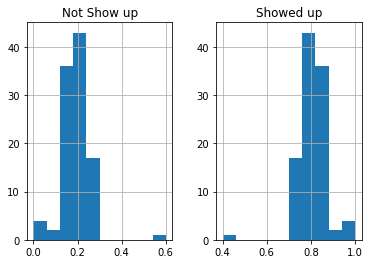

In [20]:
age_noshow.hist()

**AGE RESULTS**
> From the above plot, older people have a lesser ratio of not showing up and a higher ratio of showing up 

### Who miss their appointments more, males or females? 

In [98]:
# Lets replace F with female and M with male
no_show_appointments['Gender'] = no_show_appointments['Gender'].replace(['F'],'Female')
no_show_appointments['Gender'] = no_show_appointments['Gender'].replace(['M'],'Male')

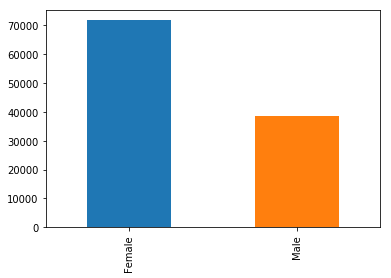

In [99]:
# Lets plot a bar chart showing the number of males and females
no_show_appointments.Gender.value_counts().plot(kind='bar')

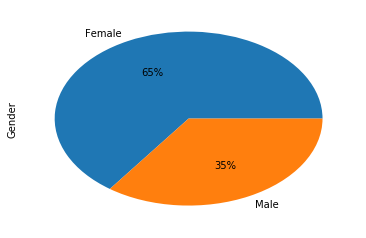

In [100]:
no_show_appointments.Gender.value_counts().plot(kind='pie',autopct='%.f%%')

>Note that there are more females than males in the dataset

In [101]:
# Here we will get a ratio correlation between gender and not showing up since by default the graph for
#females will be higher since they are more in the dataset
gender_noshow_prop = pd.crosstab(index=no_show_appointments['Gender'], columns=
                                 no_show_appointments['No-show'], normalize='index')
print(gender_noshow_prop)

No-show  Not Show up  Showed up
Gender                         
Female      0.203149   0.796851
Male        0.199679   0.800321


Text(0.5,1,'Gender vs No Show')

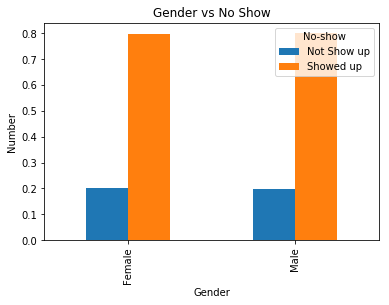

In [102]:
gender_noshow_prop.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Number')
plt.title('Gender vs No Show')

**GENDER RESULTS**
>There is no much difference between males and females who miss their appointments

### Does receiving or not receiving a message affect whether or not a patient shows up for their appointment?

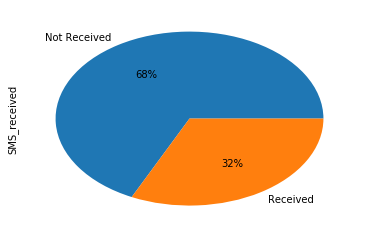

In [129]:
no_show_appointments.SMS_received.value_counts().plot(kind='pie',autopct='%.f%%')

In [124]:
#Replace 0 with not received and 1 with received
no_show_appointments['SMS_received'] = no_show_appointments['SMS_received'].replace([0],'Not Received')
no_show_appointments['SMS_received'] = no_show_appointments['SMS_received'].replace([1],'Received')

In [125]:
# We will get the proportion between SMS received and missing appointments
sms_noshow = pd.crosstab(index=no_show_appointments['SMS_received'], columns=
                                 no_show_appointments['No-show'], normalize='index')
print(sms_noshow)

No-show       Not Show up  Showed up
SMS_received                        
Not Received     0.167035   0.832965
Received         0.275745   0.724255


Text(0.5,1,'SMSs Received vs No Show')

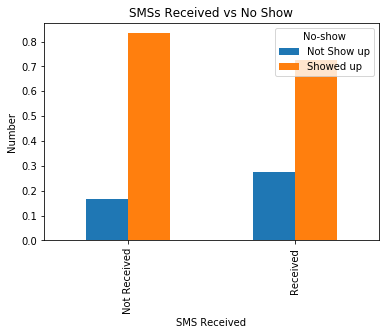

In [126]:
# We plot the relation between people who received SMSs and missing the appointments
sms_noshow.plot(kind='bar')
plt.xlabel('SMS Received')
plt.ylabel('Number')
plt.title('SMSs Received vs No Show')

**RECEIVING AN SMS RESULTS**
> 68% of patients received an SMS, however majority of the patients who did not show up for their appointments received an SMS
Therefore receiving and SMS does not guarantee that a patient will show up for their appointments

### Do people of a specific neighbourhood have a tendency of missing their appointments?

In [103]:
# We will get a proportional relation between neighbourhoods and missing of appointments
neigh_noshow_prop = pd.crosstab(index=no_show_appointments['Neighbourhood'], columns=
                                no_show_appointments['No-show'], normalize='index')
print(neigh_noshow_prop)

No-show              Not Show up  Showed up
Neighbourhood                              
AEROPORTO               0.125000   0.875000
ANDORINHAS              0.230327   0.769673
ANTÔNIO HONÓRIO         0.184502   0.815498
ARIOVALDO FAVALESSA     0.219858   0.780142
BARRO VERMELHO          0.215130   0.784870
BELA VISTA              0.201363   0.798637
BENTO FERREIRA          0.224942   0.775058
BOA VISTA               0.185897   0.814103
BONFIM                  0.198341   0.801659
CARATOÍRA               0.230409   0.769591
CENTRO                  0.210858   0.789142
COMDUSA                 0.180645   0.819355
CONQUISTA               0.188457   0.811543
CONSOLAÇÃO              0.172238   0.827762
CRUZAMENTO              0.217454   0.782546
DA PENHA                0.193505   0.806495
DE LOURDES              0.154098   0.845902
DO CABRAL               0.157143   0.842857
DO MOSCOSO              0.222760   0.777240
DO QUADRO               0.164900   0.835100
ENSEADA DO SUÁ          0.221277

Text(0.5,1,'Neighbourhood vs No Show')

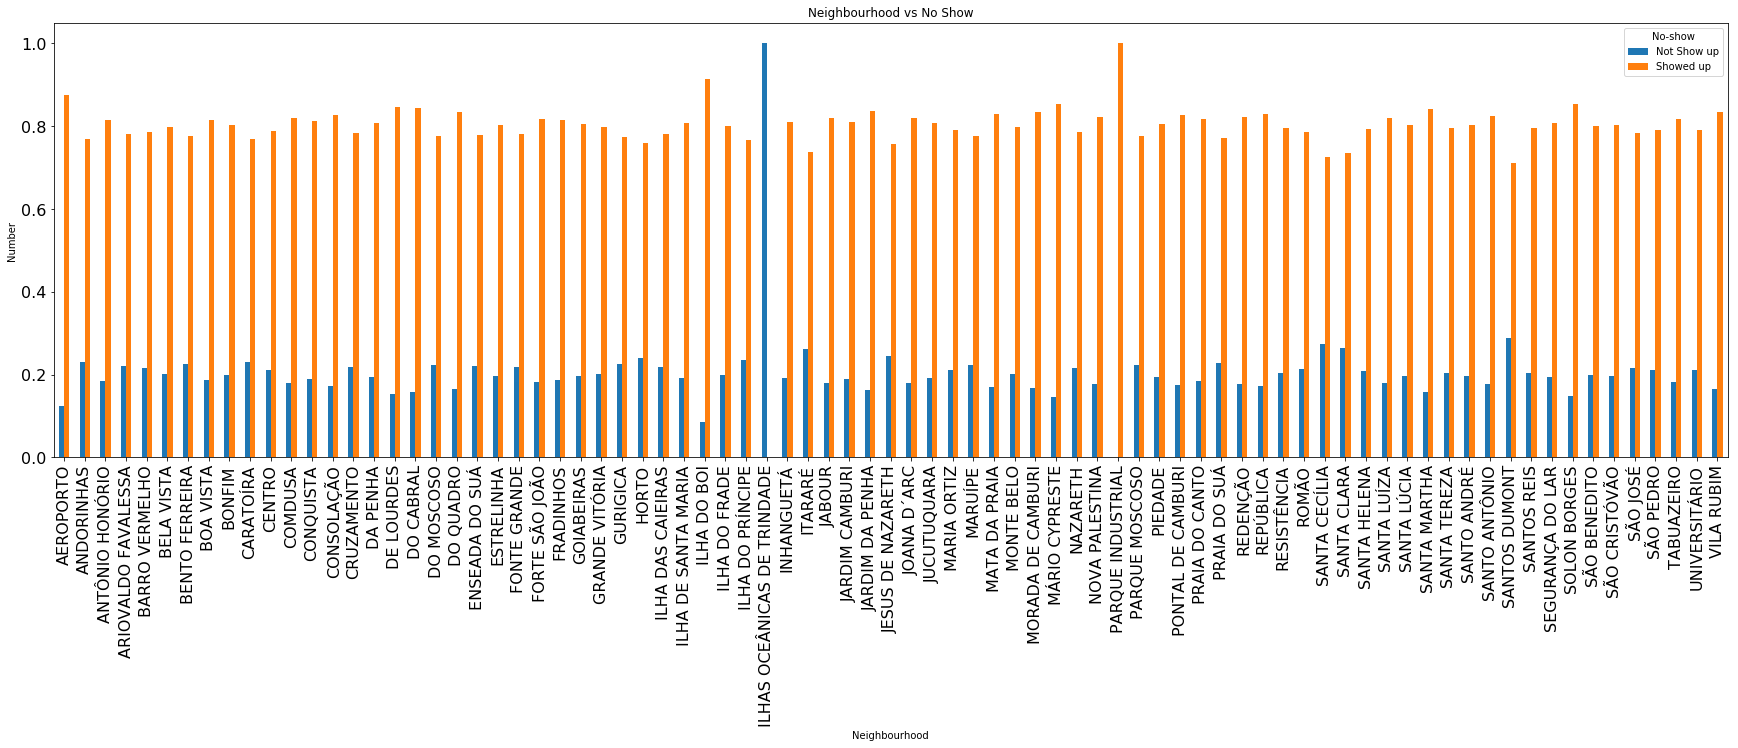

In [104]:
# Plot the realtion created above
neigh_noshow_prop.plot(kind='bar', figsize=(30,8), fontsize=16)
plt.xlabel('Neighbourhood')
plt.ylabel('Number')
plt.title('Neighbourhood vs No Show')

**NEIGHBOURHOOD RESULTS**
> Some neighbourhoods have a higher turn up than some but it is quite hard to give clear statistics since there are too many neighbourhoods

### Does the day of the week scheduled for the appointment affect whether or not a patient will miss their appointment?

In [105]:
day_noshow = pd.crosstab(index=no_show_appointments['AppointmentDay'], columns=
                                no_show_appointments['No-show'], normalize='index')
print(day_noshow)

No-show         Not Show up  Showed up
AppointmentDay                        
Friday             0.212261   0.787739
Monday             0.206481   0.793519
Saturday           0.230769   0.769231
Thursday           0.193541   0.806459
Tuesday            0.200936   0.799064
Wednesday          0.196892   0.803108


Text(0.5,1,'Day of the week vs No Show')

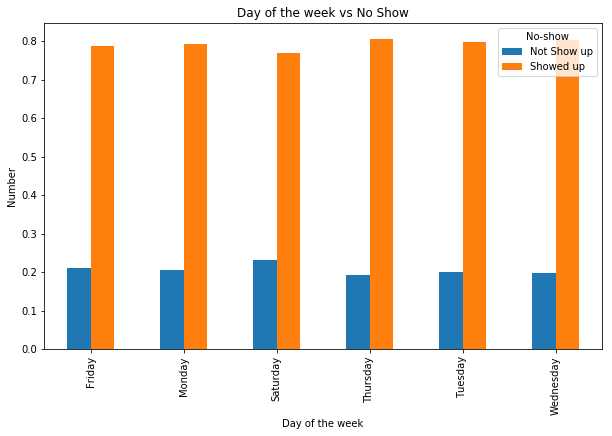

In [108]:
# Plot the relation created above
day_noshow.plot(kind='bar', figsize=(10,6))
plt.xlabel('Day of the week')
plt.ylabel('Number')
plt.title('Day of the week vs No Show')

**DAY OF THE WEEK RESULTS**
> From the plot above, there are more patients showing up on Thursday and Wednesday and fewer patients on Saturdays

<a id='conclusions'></a>
## Conclusions
1. The data set has more females than males, however there is no much difference between the males and females who did not show up for their appointments.  
2. There are more patients showing for their appointments on Thursdays and Wednesdays and fewer patients showing up on Saturdays.  
3. Some neighbourhoods have a higher turn up than some.  
4. 68% of the patients received an SMS however, majority of the patients who missed their appointments received an SMS. Therefore, there is no direct relation between receiving an SMS and showing up for the appointment.  
5. Older people have a higher ratio of showing up and a lesser ratio of not showing up.

## Limitations  
1. There is no information of how the data was collected to be able to know if the data is efficient or not.
2. The No-show column wasn't easily understandable
3. Some more data would have been added for example why the appointment was scheduled


In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0